In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ball_by_ball = pd.read_excel(r"D:\bethsheba\Python_HR\dataset\Ball_by_Ball.xlsx")
match = pd.read_excel(r"D:\bethsheba\Python_HR\dataset\Match.xlsx")
player = pd.read_excel(r"D:\bethsheba\Python_HR\dataset\Player.xlsx")
season = pd.read_excel(r"D:\bethsheba\Python_HR\dataset\Season.xlsx")
team = pd.read_excel(r"D:\bethsheba\Python_HR\dataset\Team.xlsx")

#Question 1

In [ ]:
#Q1 Total number of matches
match.columns

match['Match_Id'].shape 
#Match_Id(Unique Number Which Identifies a match) thus used this column 

#OUTPUT : There are 577 total matches in the dataset


(577,)

#Question 2

In [ ]:
#Q2 Total number of 6s and 4s
#Creting the filter condition
filter_6 = ball_by_ball['Batsman_Scored'] == 6
filter_4 = ball_by_ball['Batsman_Scored'] == 4

ball_by_ball[filter_6].shape
ball_by_ball[filter_6].shape

print("Total number of 6s:",ball_by_ball[filter_6].shape[0])
print("Total number of 4s:",ball_by_ball[filter_4].shape[0])

#Step 2: We will use the condition on the data and find the no of 6s and 4s
final_filter = ball_by_ball[filter_6 | filter_4]
print(final_filter.shape)
print("Total number of 6s and 4s:", final_filter.shape[0])

Total number of 6s: 5813
Total number of 4s: 15413
(21226, 14)
Total number of 6s and 4s: 21226


#Question 3

In [ ]:
#Find the top 10 batsman based on total runs.

#Merging the data as we dont have the batsman details in the same columns as that on the runs made
inner_df=pd.merge(ball_by_ball,player,left_on='Striker_Id', right_on ='Player_Id')
inner_df.head(10)



,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Unnamed: 6
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
1,335987,1,1,3,1,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
2,335987,1,1,3,2,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
3,335987,1,1,3,3,1,2,1,1,2,14,0,legbyes,1,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
4,335987,1,1,3,6,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
5,335987,1,1,4,4,1,2,1,1,2,13,4,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
6,335987,1,1,4,5,1,2,1,1,2,13,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
7,335987,1,1,4,6,1,2,1,1,2,13,1,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
8,335987,1,1,5,1,1,2,1,1,2,14,4,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN
9,335987,1,1,5,2,1,2,1,1,2,14,1,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN


In [ ]:
#grouping the two columns as we want the TOTAL RUNS using SUM()
ps3=inner_df.groupby('Player_Name')['Batsman_Scored'].sum().reset_index()
ps3

,Player_Name,Batsman_Scored
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Flintoff,62
4,A Kumble,35
...,...,...
429,YV Takawale,192
430,Yashpal Singh,47
431,Younis Khan,3
432,Yuvraj Singh,2339


In [ ]:
#sorting the data in desecding order so that top 10 batsman with highest runs can be found
ps3.sort_values(by='Batsman_Scored',ascending=False).head(10)

,Player_Name,Batsman_Scored
353,SK Raina,4106
407,V Kohli,4105
304,RG Sharma,3874
125,G Gambhir,3634
76,CH Gayle,3447
321,RV Uthappa,3390
93,DA Warner,3373
21,AB de Villiers,3270
243,MS Dhoni,3270
326,S Dhawan,3082



#Question 4

In [ ]:
#Find the top 10 batsman based on number of 6s

#step: filtering the data for only the 6s scored
inner_df['filter_6'] = inner_df['Batsman_Scored'] == 6
inner_df.head(10)

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Unnamed: 6,filter_6
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
1,335987,1,1,3,1,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
2,335987,1,1,3,2,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
3,335987,1,1,3,3,1,2,1,1,2,14,0,legbyes,1,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
4,335987,1,1,3,6,1,2,1,1,2,14,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
5,335987,1,1,4,4,1,2,1,1,2,13,4,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
6,335987,1,1,4,5,1,2,1,1,2,13,0,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
7,335987,1,1,4,6,1,2,1,1,2,13,1,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
8,335987,1,1,5,1,1,2,1,1,2,14,4,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False
9,335987,1,1,5,2,1,2,1,1,2,14,1,,0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,NaN,False


In [ ]:
#grouping the data based on the two columns Player_Name,and the filtered out data of 6s using SUM()
ps4=inner_df.groupby('Player_Name')['filter_6'].sum().reset_index()
ps4

,Player_Name,filter_6
0,A Ashish Reddy,15
1,A Chandila,0
2,A Chopra,0
3,A Flintoff,2
4,A Kumble,0
...,...,...
429,YV Takawale,3
430,Yashpal Singh,0
431,Younis Khan,0
432,Yuvraj Singh,133


In [ ]:
#Step : showing the top 10 batsman with based on number of 6s
top10_6s =(ps4.sort_values(by='filter_6',ascending=False).head(10))
top10_6s

,Player_Name,filter_6
76,CH Gayle,252
304,RG Sharma,164
353,SK Raina,161
407,V Kohli,148
427,YK Pathan,143
21,AB de Villiers,142
243,MS Dhoni,140
93,DA Warner,134
432,Yuvraj Singh,133
176,KA Pollard,125


In [ ]:
#Step3 : rename the columns name
#syntax : dataset.rename(columns={'current col name' :'new name'})

top10_6s = top10_6s.rename(columns={'filter_6':'No of 6s'})
top10_6s

,Player_Name,No of 6s
76,CH Gayle,252
304,RG Sharma,164
353,SK Raina,161
407,V Kohli,148
427,YK Pathan,143
21,AB de Villiers,142
243,MS Dhoni,140
93,DA Warner,134
432,Yuvraj Singh,133
176,KA Pollard,125


#Question 5

In [ ]:
#Find the top 10 batsman based on number of centuries.
ps5=ball_by_ball.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()
ps5.head()

,Match_Id,Striker_Id,Batsman_Scored
0,335987,1,10
1,335987,2,158
2,335987,3,20
3,335987,4,12
4,335987,5,5


In [ ]:
filter_1 = ps5['Batsman_Scored'] >=100
output =ps5[filter_1]
output.shape

(42, 3)

In [ ]:
#chceking is any data has Batsman_Scored>200
filter_2=ps5['Batsman_Scored'] >=200
above200=ps5[filter_2]
above200.shape

(0, 3)

In [ ]:
#as we have filtered the data with values above 100 only so there is no point is finding value<100
#in the data there is no Batsman_Scored<200 as alreday checked in filter 'above200'
#hence now checking century from 100 to 200 only
output['Century_count'] = np.where(output['Batsman_Scored']>=100,
                                   1,0)                          

output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Match_Id,Striker_Id,Batsman_Scored,Century_count
1,335987,2,158,1
18,335988,19,116,1
127,335995,56,117,1
189,335999,53,109,1
554,336023,44,114,1
570,336024,100,115,1
997,392194,110,105,1
1703,392241,96,114,1
1771,419112,31,100,1
2151,419136,187,107,1


In [ ]:
player_Brief=player[['Player_Name','Player_Id']]
player_Brief

,Player_Name,Player_Id
0,SC Ganguly,1
1,BB McCullum,2
2,RT Ponting,3
3,DJ Hussey,4
4,Mohammad Hafeez,5
...,...,...
518,Subroto Das,519
519,K Srinivasan,520
520,VK Sharma,521
521,AV Wankhade,523


In [ ]:
a=pd.merge(output,player_Brief,left_on='Striker_Id', right_on ='Player_Id')
a

,Match_Id,Striker_Id,Batsman_Scored,Century_count,Player_Name,Player_Id
0,335987,2,158,1,BB McCullum,2
1,829716,2,100,1,BB McCullum,2
2,335988,19,116,1,MEK Hussey,19
3,335995,56,117,1,A Symonds,56
4,335999,53,109,1,AC Gilchrist,53
5,501265,53,106,1,AC Gilchrist,53
6,336023,44,114,1,ST Jayasuriya,44
7,336024,100,115,1,SE Marsh,100
8,392194,110,105,1,AB de Villiers,110
9,829800,110,133,1,AB de Villiers,110


In [ ]:
result = a.groupby(['Player_Name','Striker_Id'])['Century_count'].sum().reset_index()
result

,Player_Name,Striker_Id,Century_count
0,A Symonds,56,1
1,AB de Villiers,110,3
2,AC Gilchrist,53,2
3,AM Rahane,85,1
4,BB McCullum,2,2
5,CH Gayle,162,5
6,DA Miller,320,1
7,DA Warner,187,2
8,DPMD Jayawardene,64,1
9,KP Pietersen,158,1


In [ ]:
result.sort_values(by='Century_count',ascending=False).head(10)

,Player_Name,Striker_Id,Century_count
5,CH Gayle,162,5
23,V Kohli,8,4
1,AB de Villiers,110,3
2,AC Gilchrist,53,2
4,BB McCullum,2,2
24,V Sehwag,41,2
7,DA Warner,187,2
21,SR Watson,32,2
11,M Vijay,185,2
0,A Symonds,56,1


#Question 6 

In [ ]:
#Find the top 10 batsman based on batting average (which is total runs by total matches played).
qs6_1 = inner_df.groupby('Player_Name')['Match_Id'].size().reset_index()
qs6_1

,Player_Name,Match_Id
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Flintoff,57
4,A Kumble,49
...,...,...
429,YV Takawale,183
430,Yashpal Singh,67
431,Younis Khan,7
432,Yuvraj Singh,1862


In [ ]:

qs6_2 = inner_df.groupby('Player_Name')['Batsman_Scored'].sum().reset_index()
qs6_2

,Player_Name,Batsman_Scored
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Flintoff,62
4,A Kumble,35
...,...,...
429,YV Takawale,192
430,Yashpal Singh,47
431,Younis Khan,3
432,Yuvraj Singh,2339


In [ ]:
new_df=pd.merge(qs6_1,qs6_2,on='Player_Name')
new_df.head(10)

,Player_Name,Match_Id,Batsman_Scored
0,A Ashish Reddy,196,280
1,A Chandila,7,4
2,A Chopra,75,53
3,A Flintoff,57,62
4,A Kumble,49,35
5,A Mishra,326,291
6,A Mithun,26,34
7,A Mukund,23,19
8,A Nehra,63,41
9,A Singh,10,2


In [ ]:
new_df['batting_avg']= (new_df['Batsman_Scored']/new_df['Match_Id'])

In [ ]:
new_df.sort_values(by='batting_avg',ascending=False).head(10)

,Player_Name,Match_Id,Batsman_Scored,batting_avg
86,CR Brathwaite,40,83,2.075000
406,Umar Gul,19,39,2.052632
318,RS Sodhi,2,4,2.000000
182,KH Pandya,127,237,1.866142
380,Shahid Afridi,46,81,1.760870
142,I Malhotra,4,7,1.750000
361,SN Khan,103,177,1.718447
62,BCJ Cutting,43,73,1.697674
202,LJ Wright,63,106,1.682540
382,Shivam Sharma,3,5,1.666667


#Question 7

In [ ]:
#What is the percentage of matches won by team winning the toss?
ps7=match.groupby(['Toss_Winner_Id'])['Match_Winner_Id'].size().reset_index()
ps7

,Toss_Winner_Id,Match_Winner_Id
0,1,69
1,2,61
2,3,66
3,4,64
4,5,63
5,6,64
6,7,74
7,8,43
8,9,8
9,10,20


Text(0.5, 1.0, 'matches won by team winning the toss')

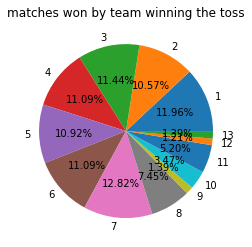

In [ ]:
plt.pie(ps7['Match_Winner_Id'],labels = ps7['Toss_Winner_Id'],autopct= '%.2f%%')
plt.title('matches won by team winning the toss')

#Question 8

In [2]:
#Find the total number of IPL title win for each team
team_match_df=pd.merge(team,match,left_on='Team_Id', right_on ='Match_Winner_Id')
team_match_df.head()

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country
0,1,Kolkata Knight Riders,KKR,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,Bangalore,India
1,1,Kolkata Knight Riders,KKR,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,Kolkata,India
2,1,Kolkata Knight Riders,KKR,336015,2008-05-08,1,2,1,Eden Gardens,1,bat,0,1,0,by runs,5.0,1.0,1.0,Kolkata,India
3,1,Kolkata Knight Riders,KKR,336019,2008-05-11,8,1,1,"Rajiv Gandhi International Stadium, Uppal",1,bat,0,1,0,by runs,23.0,1.0,1.0,Hyderabad,India
4,1,Kolkata Knight Riders,KKR,336022,2008-05-13,1,6,1,Eden Gardens,1,bat,0,1,0,by runs,23.0,1.0,144.0,Kolkata,India


In [8]:
team_match_df['Month text'] = team_match_df['Match_Date'].dt.month_name()
team_match_df.head()

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
0,1,Kolkata Knight Riders,KKR,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,Bangalore,India,April,18,2008
1,1,Kolkata Knight Riders,KKR,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,Kolkata,India,April,20,2008
2,1,Kolkata Knight Riders,KKR,336015,2008-05-08,1,2,1,Eden Gardens,1,bat,0,1,0,by runs,5.0,1.0,1.0,Kolkata,India,May,8,2008
3,1,Kolkata Knight Riders,KKR,336019,2008-05-11,8,1,1,"Rajiv Gandhi International Stadium, Uppal",1,bat,0,1,0,by runs,23.0,1.0,1.0,Hyderabad,India,May,11,2008
4,1,Kolkata Knight Riders,KKR,336022,2008-05-13,1,6,1,Eden Gardens,1,bat,0,1,0,by runs,23.0,1.0,144.0,Kolkata,India,May,13,2008


In [9]:
team_match_df['Day_number'] = team_match_df['Match_Date'].dt.day
team_match_df.head()

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
0,1,Kolkata Knight Riders,KKR,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,Bangalore,India,April,18,2008
1,1,Kolkata Knight Riders,KKR,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,Kolkata,India,April,20,2008
2,1,Kolkata Knight Riders,KKR,336015,2008-05-08,1,2,1,Eden Gardens,1,bat,0,1,0,by runs,5.0,1.0,1.0,Kolkata,India,May,8,2008
3,1,Kolkata Knight Riders,KKR,336019,2008-05-11,8,1,1,"Rajiv Gandhi International Stadium, Uppal",1,bat,0,1,0,by runs,23.0,1.0,1.0,Hyderabad,India,May,11,2008
4,1,Kolkata Knight Riders,KKR,336022,2008-05-13,1,6,1,Eden Gardens,1,bat,0,1,0,by runs,23.0,1.0,144.0,Kolkata,India,May,13,2008


In [10]:
team_match_df['year_number'] = team_match_df['Match_Date'].dt.year
team_match_df.head()


,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
0,1,Kolkata Knight Riders,KKR,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,Bangalore,India,April,18,2008
1,1,Kolkata Knight Riders,KKR,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,Kolkata,India,April,20,2008
2,1,Kolkata Knight Riders,KKR,336015,2008-05-08,1,2,1,Eden Gardens,1,bat,0,1,0,by runs,5.0,1.0,1.0,Kolkata,India,May,8,2008
3,1,Kolkata Knight Riders,KKR,336019,2008-05-11,8,1,1,"Rajiv Gandhi International Stadium, Uppal",1,bat,0,1,0,by runs,23.0,1.0,1.0,Hyderabad,India,May,11,2008
4,1,Kolkata Knight Riders,KKR,336022,2008-05-13,1,6,1,Eden Gardens,1,bat,0,1,0,by runs,23.0,1.0,144.0,Kolkata,India,May,13,2008


In [82]:
#filtering the data to get all the PARTICULAR YEAR data for max year value
filter_2008 = team_match_df['year_number'] == 2008
year_2008=team_match_df[filter_2008]

filter_2009 = team_match_df['year_number'] == 2009
year_2009=team_match_df[filter_2009]

filter_2010 = team_match_df['year_number'] == 2010
year_2010=team_match_df[filter_2010]

filter_2011 = team_match_df['year_number'] == 2011
year_2011=team_match_df[filter_2011]

filter_2012 = team_match_df['year_number'] == 2012
year_2012=team_match_df[filter_2012]

filter_2013 = team_match_df['year_number'] == 2013
year_2013=team_match_df[filter_2013]

filter_2014 = team_match_df['year_number'] == 2014
year_2014=team_match_df[filter_2014]

filter_2015 = team_match_df['year_number'] == 2015
year_2015=team_match_df[filter_2015]

filter_2016 = team_match_df['year_number'] == 2016
year_2016=team_match_df[filter_2016]

In [81]:
#finding the max date so that the last match details of that year of season will be used  futher
max(year_2008['Match_Date'])

Timestamp('2008-06-01 00:00:00')

In [80]:
max(year_2009['Match_Date'])

Timestamp('2009-05-24 00:00:00')

In [79]:
max(year_2010['Match_Date'])

Timestamp('2010-04-25 00:00:00')

In [78]:
max(year_2011['Match_Date'])

Timestamp('2011-05-28 00:00:00')

In [77]:
max(year_2012['Match_Date'])

Timestamp('2012-05-27 00:00:00')

In [76]:
max(year_2013['Match_Date'])

Timestamp('2013-05-26 00:00:00')

In [75]:
max(year_2014['Match_Date'])

Timestamp('2014-06-01 00:00:00')

In [83]:
max(year_2015['Match_Date'])

Timestamp('2015-05-24 00:00:00')

In [84]:
max(year_2016['Match_Date'])

Timestamp('2016-05-29 00:00:00')

In [87]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2008 is 1st JUNE

#so using that as final filter for season 1 or 2008

filter_1a = team_match_df['Month text'] == 'June'
filter_1b = team_match_df['year_number'] == 2008
team_match_df[filter_1a & filter_1b]

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008


In [92]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2009 is 24th MAY

#so using that as final filter for season 2 or 2009

filter_2a = team_match_df['Month text'] == 'May'
filter_2b = team_match_df['Day_number'] == 24
filter_2c = team_match_df['year_number'] == 2009
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c]

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [93]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2010 is 25th April

#so using that as final filter for season 3 or 2010

filter_3a = team_match_df['Month text'] == 'April'
filter_3b = team_match_df['Day_number'] == 25
filter_3c = team_match_df['year_number'] == 2010
filter_3_10 = team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c]
filter_3_10

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [95]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2011 is 28th May

#so using that as final filter for season 4 or 2011

filter_4a = team_match_df['Month text'] == 'May'
filter_4b = team_match_df['Day_number'] == 28
filter_4c = team_match_df['year_number'] == 2011
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c]

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [102]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2012 is 27th May

#so using that as final filter for season 5 or 2012

filter_5a = team_match_df['Month text'] == 'May'
filter_5b = team_match_df['Day_number'] == 27
filter_5c = team_match_df['year_number'] == 2012
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c | filter_5a & filter_5b & filter_5c]

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
35,1,Kolkata Knight Riders,KKR,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,Chennai,India,May,27,2012
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [104]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2013 is 26th May

#so using that as final filter for season 6 or 2013

filter_6a = team_match_df['Month text'] == 'May'
filter_6b = team_match_df['Day_number'] == 26
filter_6c = team_match_df['year_number'] == 2013
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c | filter_5a & filter_5b & filter_5c |filter_6a & filter_6b & filter_6c ]


,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
35,1,Kolkata Knight Riders,KKR,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,Chennai,India,May,27,2012
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
454,7,Mumbai Indians,MI,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,0,by runs,23.0,7.0,221.0,Kolkata,India,May,26,2013
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [105]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2014 is 1st June

#so using that as final filter for season 7 or 2014

filter_7a = team_match_df['Month text'] == 'June'
filter_7b = team_match_df['Day_number'] == 1
filter_7c = team_match_df['year_number'] == 2014
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c | filter_5a & filter_5b & filter_5c |filter_6a & filter_6b & filter_6c |filter_6a & filter_6b & filter_6c
              |filter_7a & filter_7b & filter_7c ]


,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
35,1,Kolkata Knight Riders,KKR,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,Chennai,India,May,27,2012
52,1,Kolkata Knight Riders,KKR,734054,2014-06-01,1,4,7,M Chinnaswamy Stadium,1,field,0,1,0,by wickets,3.0,1.0,96.0,Bangalore,India,June,1,2014
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
454,7,Mumbai Indians,MI,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,0,by runs,23.0,7.0,221.0,Kolkata,India,May,26,2013
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [106]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2014 is 24th May

#so using that as final filter for season 7 or 2015

filter_8a = team_match_df['Month text'] == 'May'
filter_8b = team_match_df['Day_number'] == 24
filter_8c = team_match_df['year_number'] == 2015
team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c | filter_5a & filter_5b & filter_5c |filter_6a & filter_6b & filter_6c |filter_6a & filter_6b & filter_6c
              |filter_7a & filter_7b & filter_7c |filter_8a & filter_8b & filter_8c ]


,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
35,1,Kolkata Knight Riders,KKR,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,Chennai,India,May,27,2012
52,1,Kolkata Knight Riders,KKR,734054,2014-06-01,1,4,7,M Chinnaswamy Stadium,1,field,0,1,0,by wickets,3.0,1.0,96.0,Bangalore,India,June,1,2014
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
454,7,Mumbai Indians,MI,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,0,by runs,23.0,7.0,221.0,Kolkata,India,May,26,2013
471,7,Mumbai Indians,MI,829828,2015-05-24,7,3,8,Eden Gardens,3,field,0,1,0,by runs,41.0,7.0,57.0,Kolkata,India,May,24,2015
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009


In [108]:
#now we want to see the team who won the last match of the season
#as the maxdate for 2014 is 29th May

#so using that as final filter for season 7 or 2015

filter_9a = team_match_df['Month text'] == 'May'
filter_9b = team_match_df['Day_number'] == 29
filter_9c = team_match_df['year_number'] == 2016
final_data = team_match_df[filter_1a & filter_1b | filter_2a & filter_2b & filter_2c | filter_3a & filter_3b & filter_3c |filter_4a & filter_4b & filter_4c | filter_5a & filter_5b & filter_5c |filter_6a & filter_6b & filter_6c |filter_6a & filter_6b & filter_6c
              |filter_7a & filter_7b & filter_7c |filter_8a & filter_8b & filter_8c |filter_9a & filter_9b & filter_9c]


In [109]:
#this is final data after filtering the data for each year
final_data

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,City_Name,Host_Country,Month text,Day_number,year_number
35,1,Kolkata Knight Riders,KKR,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,Chennai,India,May,27,2012
52,1,Kolkata Knight Riders,KKR,734054,2014-06-01,1,4,7,M Chinnaswamy Stadium,1,field,0,1,0,by wickets,3.0,1.0,96.0,Bangalore,India,June,1,2014
163,3,Chennai Super Kings,CSK,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,Mumbai,India,April,25,2010
174,3,Chennai Super Kings,CSK,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,Chennai,India,May,28,2011
292,5,Rajasthan Royals,RR,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,Mumbai,India,June,1,2008
454,7,Mumbai Indians,MI,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,0,by runs,23.0,7.0,221.0,Kolkata,India,May,26,2013
471,7,Mumbai Indians,MI,829828,2015-05-24,7,3,8,Eden Gardens,3,field,0,1,0,by runs,41.0,7.0,57.0,Kolkata,India,May,24,2015
489,8,Deccan Chargers,DC,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,Johannesburg,South Africa,May,24,2009
559,11,Sunrisers Hyderabad,SRH,981024,2016-05-29,2,11,9,M Chinnaswamy Stadium,11,bat,0,1,0,by runs,8.0,11.0,385.0,Bangalore,India,May,29,2016


In [111]:
ps8=final_data.groupby(['Team_Name'])['Match_Winner_Id'].size().reset_index()
ps8

,Team_Name,Match_Winner_Id
0,Chennai Super Kings,2
1,Deccan Chargers,1
2,Kolkata Knight Riders,2
3,Mumbai Indians,2
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


In [115]:
ps8 = ps8.rename(columns={'Total number of IPL title won':'Total_IPL_title_won'})
ps8

,Team_Name,Total_IPL_title_won
0,Chennai Super Kings,2
1,Deccan Chargers,1
2,Kolkata Knight Riders,2
3,Mumbai Indians,2
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


In [116]:
ps8.sort_values(by='Total_IPL_title_won',ascending=False)

,Team_Name,Total_IPL_title_won
0,Chennai Super Kings,2
2,Kolkata Knight Riders,2
3,Mumbai Indians,2
1,Deccan Chargers,1
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


#Question 9

In [ ]:
#Considering that a match score of greater than 300 is treated as "High Scoring Match" and match
#score less than or equal to 300 is treated as "Low scoring match", which season has the highest
#percentage of high scoring matches?

In [ ]:
ps9 = ball_by_ball.groupby(['Season_Id','Match_Id'])['Batsman_Scored'].sum().reset_index()
ps9

,Season_Id,Match_Id,Batsman_Scored
0,1,335987,268
1,1,335988,430
2,1,335989,240
3,1,335990,315
4,1,335991,184
...,...,...,...
572,9,981016,261
573,9,981018,290
574,9,981020,287
575,9,981022,318


In [ ]:
ps9['Match_scoring_type'] =np.where(ps9['Batsman_Scored']<=300,"Low scoring match","High Scoring Match")
ps9

,Season_Id,Match_Id,Batsman_Scored,Match_scoring_type
0,1,335987,268,Low scoring match
1,1,335988,430,High Scoring Match
2,1,335989,240,Low scoring match
3,1,335990,315,High Scoring Match
4,1,335991,184,Low scoring match
...,...,...,...,...
572,9,981016,261,Low scoring match
573,9,981018,290,Low scoring match
574,9,981020,287,Low scoring match
575,9,981022,318,High Scoring Match


In [ ]:
final_result=ps9.groupby(['Match_scoring_type','Season_Id'],)['Batsman_Scored'].sum().reset_index()
final_result

,Match_scoring_type,Season_Id,Batsman_Scored
0,High Scoring Match,1,8315
1,High Scoring Match,2,4233
2,High Scoring Match,3,8766
3,High Scoring Match,4,7553
4,High Scoring Match,5,9478
5,High Scoring Match,6,9329
6,High Scoring Match,7,10771
7,High Scoring Match,8,10436
8,High Scoring Match,9,11709
9,Low scoring match,1,8483


In [ ]:
filter_part2=final_result['Match_scoring_type']=="High Scoring Match"
my_output=final_result[filter_part2]
my_output.sort_values(by='Batsman_Scored',ascending=False)

,Match_scoring_type,Season_Id,Batsman_Scored
8,High Scoring Match,9,11709
6,High Scoring Match,7,10771
7,High Scoring Match,8,10436
4,High Scoring Match,5,9478
5,High Scoring Match,6,9329
2,High Scoring Match,3,8766
0,High Scoring Match,1,8315
3,High Scoring Match,4,7553
1,High Scoring Match,2,4233


Text(0.5, 1.0, 'Season has the highest percentage of high scoring matches')

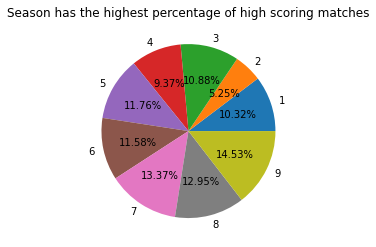

In [ ]:
plt.pie(my_output['Batsman_Scored'],labels = my_output['Season_Id'],autopct= '%.2f%%')
plt.title('Season has the highest percentage of high scoring matches')

#thus the season 9 has the highest % = 14.53%

#Question 10

Text(0.5, 1.0, 'Winning the toss and fielding first')

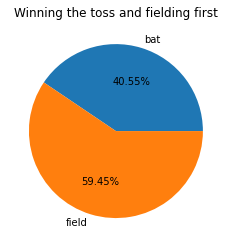

In [ ]:
#Find the percentage match win for the following:
#a. Winning the toss and fielding first
filter1=match['Match_Winner_Id'] == match['Toss_Winner_Id']
final = match[filter1]

df_toss=final.groupby(['Toss_Decision'])['Toss_Winner_Id'].size().reset_index()
df_toss

plt.pie(df_toss['Toss_Winner_Id'],labels = df_toss['Toss_Decision'],autopct= '%.2f%%')
plt.title('Winning the toss and fielding first')

Text(0.5, 1.0, 'Winning the match and Playing at home ground')

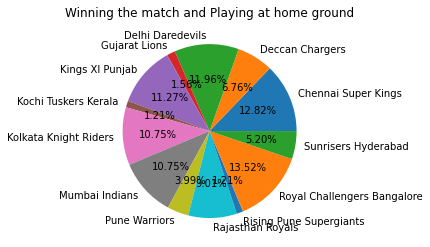

In [ ]:
#b. Playing at home ground
match_team_df=pd.merge(match,team,left_on='Team_Name_Id', right_on ='Team_Id')


df_home=match_team_df.groupby(['Team_Name'])['Match_Winner_Id'].size().reset_index()
df_home

plt.pie(df_home['Match_Winner_Id'],labels = df_home['Team_Name'],autopct= '%.2f%%')
plt.title('Winning the match and Playing at home ground')